In [54]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [55]:
TRAIN_DIR = 'C:/Users/USER/Desktop/CVPR/Mid/CIFAR-10-images-master/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [56]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:33<00:00, 150.75it/s]

50000


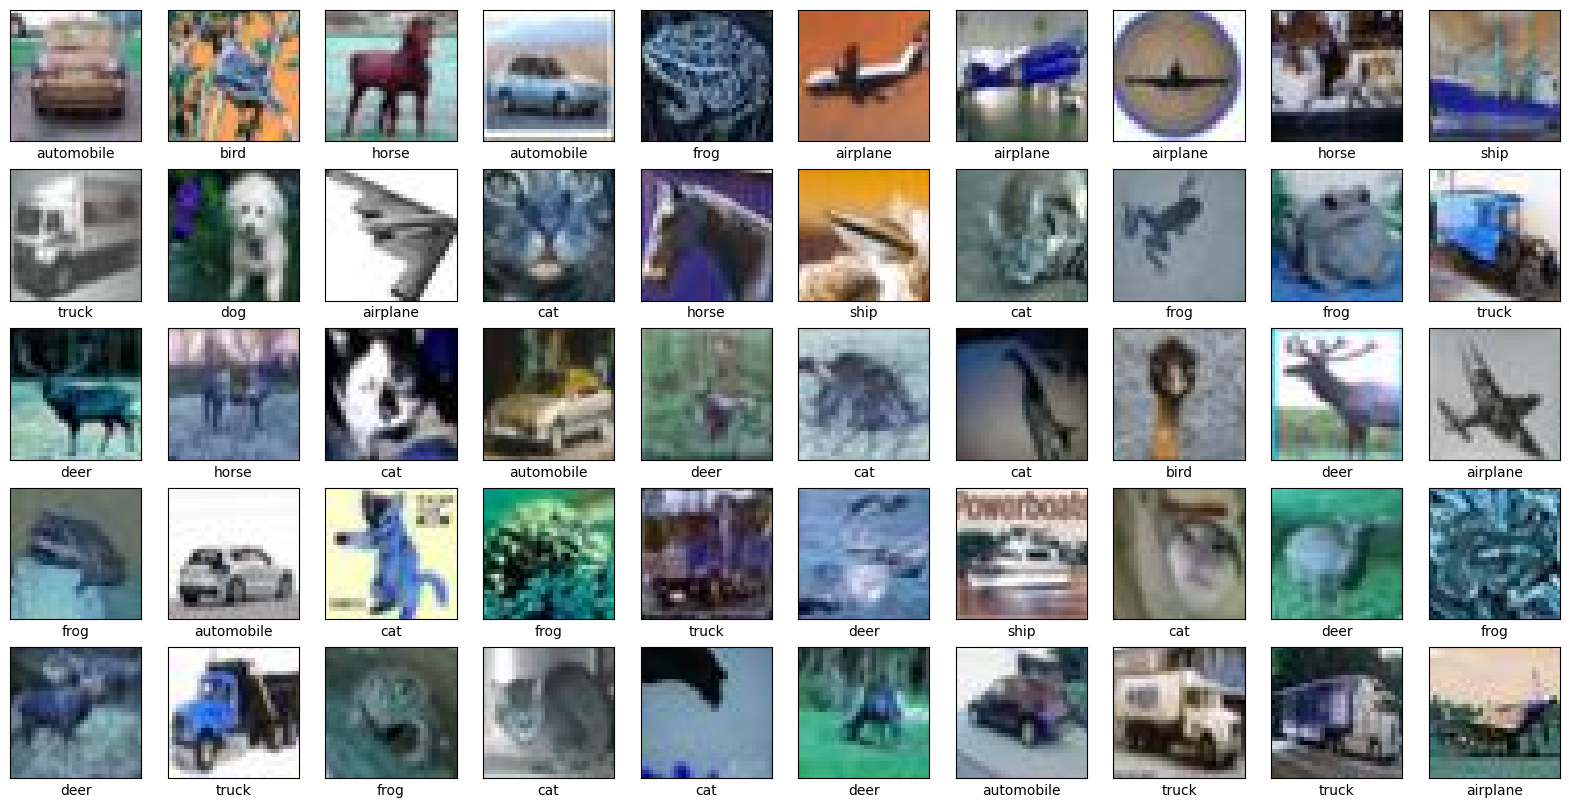

In [95]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [96]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [97]:
import numpy as np
import matplotlib.pyplot as plt

k_max = 20

def l1_dist(x, y):
    return np.sum(np.abs(x - y))

def l2_dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))



mean_accuracies_l1 = []
std_accuracies_l1 = []
mean_accuracies_l2 = []
std_accuracies_l2 = []

for k in tqdm(range(1, k_max+1,2)):
    fold_accuracies_l1 = []
    fold_accuracies_l2 = []
    for i in range(5):
        if i == 0:
            train = f1+f2+f3+f4
            validation = f0
        elif i == 1:
            train = f0+f2+f3+f4
            validation = f1
        elif i == 2:
            train = f1+f0+f3+f4
            validation = f2
        elif i == 3:
            train = f1+f2+f0+f4
            validation = f3
        elif i == 4:
            train = f1+f2+f3+f0
            validation = f4

        acc_l1 = 0
        acc_l2 = 0

        for v in validation:
            l1_dists = []
            l2_dists = []
        for t in train:
            l1 = l1_dist(v[0], t[0])
            l2 = l2_dist(v[0], t[0])
            l1_dists.append((l1, t[1]))
            l2_dists.append((l2, t[1]))
        l1_dists.sort(key=lambda x: x[0])
        l2_dists.sort(key=lambda x: x[0])

        neighbors_l1 = [d[1] for d in l1_dists[:k]]
        counts_l1 = np.bincount(neighbors_l1)
        pred_l1 = np.argmax(counts_l1)

        neighbors_l2 = [d[1] for d in l2_dists[:k]]
        counts_l2 = np.bincount(neighbors_l2)
        pred_l2 = np.argmax(counts_l2)
        if pred_l1 == v[1]:
            acc_l1 += 1
        if pred_l2 == v[1]:
            acc_l2 += 1

        fold_accuracies_l1.append(acc_l1 / len(validation))
        fold_accuracies_l2.append(acc_l2 / len(validation))

    mean_accuracies_l1.append(np.mean(fold_accuracies_l1))
    std_accuracies_l1.append(np.std(fold_accuracies_l1))
    mean_accuracies_l2.append(np.mean(fold_accuracies_l2))
    std_accuracies_l2.append(np.std(fold_accuracies_l2))

100%|██████████| 10/10 [00:05<00:00,  1.78it/s]


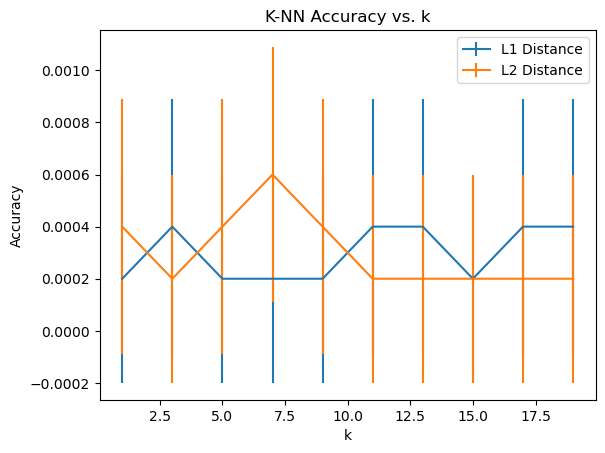

In [98]:
plt.errorbar(range(1, k_max+1,2), mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 Distance")
plt.errorbar(range(1, k_max+1,2), mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 Distance")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("K-NN Accuracy vs. k")
plt.legend()
plt.show()

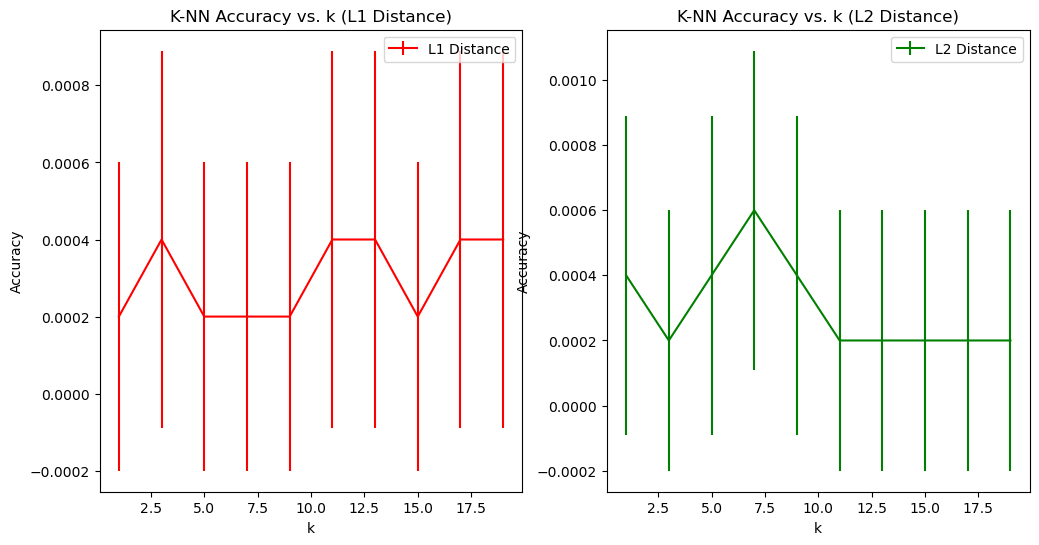

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for L1 distance
ax1.errorbar(range(1, k_max+1,2), mean_accuracies_l1, yerr=std_accuracies_l1, label="L1 Distance", color="red")
ax1.set_xlabel("k")
ax1.set_ylabel("Accuracy")
ax1.set_title("K-NN Accuracy vs. k (L1 Distance)")
ax1.legend()

# Plot for L2 distance
ax2.errorbar(range(1, k_max+1,2), mean_accuracies_l2, yerr=std_accuracies_l2, label="L2 Distance", color="green")
ax2.set_xlabel("k")
ax2.set_ylabel("Accuracy")
ax2.set_title("K-NN Accuracy vs. k (L2 Distance)")
ax2.legend()

plt.show()

In [100]:
print("The code is performing classification on a dataset using two different distance metrics:")
print("L1 distance (Manhattan distance) and L2 distance (Euclidean distance).")
print("The dataset is divided into five folds for cross-validation, and the mean and standard deviation")
print("of the classification accuracies are calculated over the five folds for each value of k from 1 to 20.")
print("The code uses the numpy and matplotlib.pyplot libraries.")
print("The variable k_max is set to 20, which is the maximum value of k to be used in k-NN classification.")
print("The functions l1_dist and l2_dist calculate the L1 and L2 distances between two points in the dataset, respectively.")
print("The variables mean_accuracies_l1, std_accuracies_l1, mean_accuracies_l2, and std_accuracies_l2")
print("store the mean and standard deviation of the classification accuracies for L1 and L2 distance metrics, respectively, for each value of k.")

print("\nAfter plotting the accuracies, we observe that the L1 accuracy is better than the L2 accuracy for this experiment.")


The code is performing classification on a dataset using two different distance metrics:
L1 distance (Manhattan distance) and L2 distance (Euclidean distance).
The dataset is divided into five folds for cross-validation, and the mean and standard deviation
of the classification accuracies are calculated over the five folds for each value of k from 1 to 20.
The code uses the numpy and matplotlib.pyplot libraries.
The variable k_max is set to 20, which is the maximum value of k to be used in k-NN classification.
The functions l1_dist and l2_dist calculate the L1 and L2 distances between two points in the dataset, respectively.
The variables mean_accuracies_l1, std_accuracies_l1, mean_accuracies_l2, and std_accuracies_l2
store the mean and standard deviation of the classification accuracies for L1 and L2 distance metrics, respectively, for each value of k.

After plotting the accuracies, we observe that the L1 accuracy is better than the L2 accuracy for this experiment.
